In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import numpy as np
from gymnax.visualize import GymAnimator

# Import JAX policy function
import sys
sys.path.append("..")
from examples.ffw_pendulum import ffw_policy

# Load + Reshape the evolved agent's params

In [2]:
from evosax.utils import load_logger, flat_to_network
evo_logger = load_logger('pendulum_log.pkl')

In [3]:
evo_logger.keys()

dict_keys(['top_values', 'top_params', 'log_top_1', 'log_top_mean', 'log_top_std', 'log_gen_1', 'log_gen_mean', 'log_gen_std', 'log_sigma', 'log_gen', 'network_shapes'])

In [4]:
evo_logger['top_params'].shape

(5, 81)

In [5]:
evolved_params = flat_to_network(evo_logger['top_params'][0],
                                 evo_logger['network_shapes'])

# Rollout and visualize the agent's behavior

In [6]:
animator = GymAnimator(policy=ffw_policy,
                       policy_params=evolved_params,
                       env_name='Pendulum-v0')

Finished rolling out agent & collecting frames.
Finished processing frames to .gif.


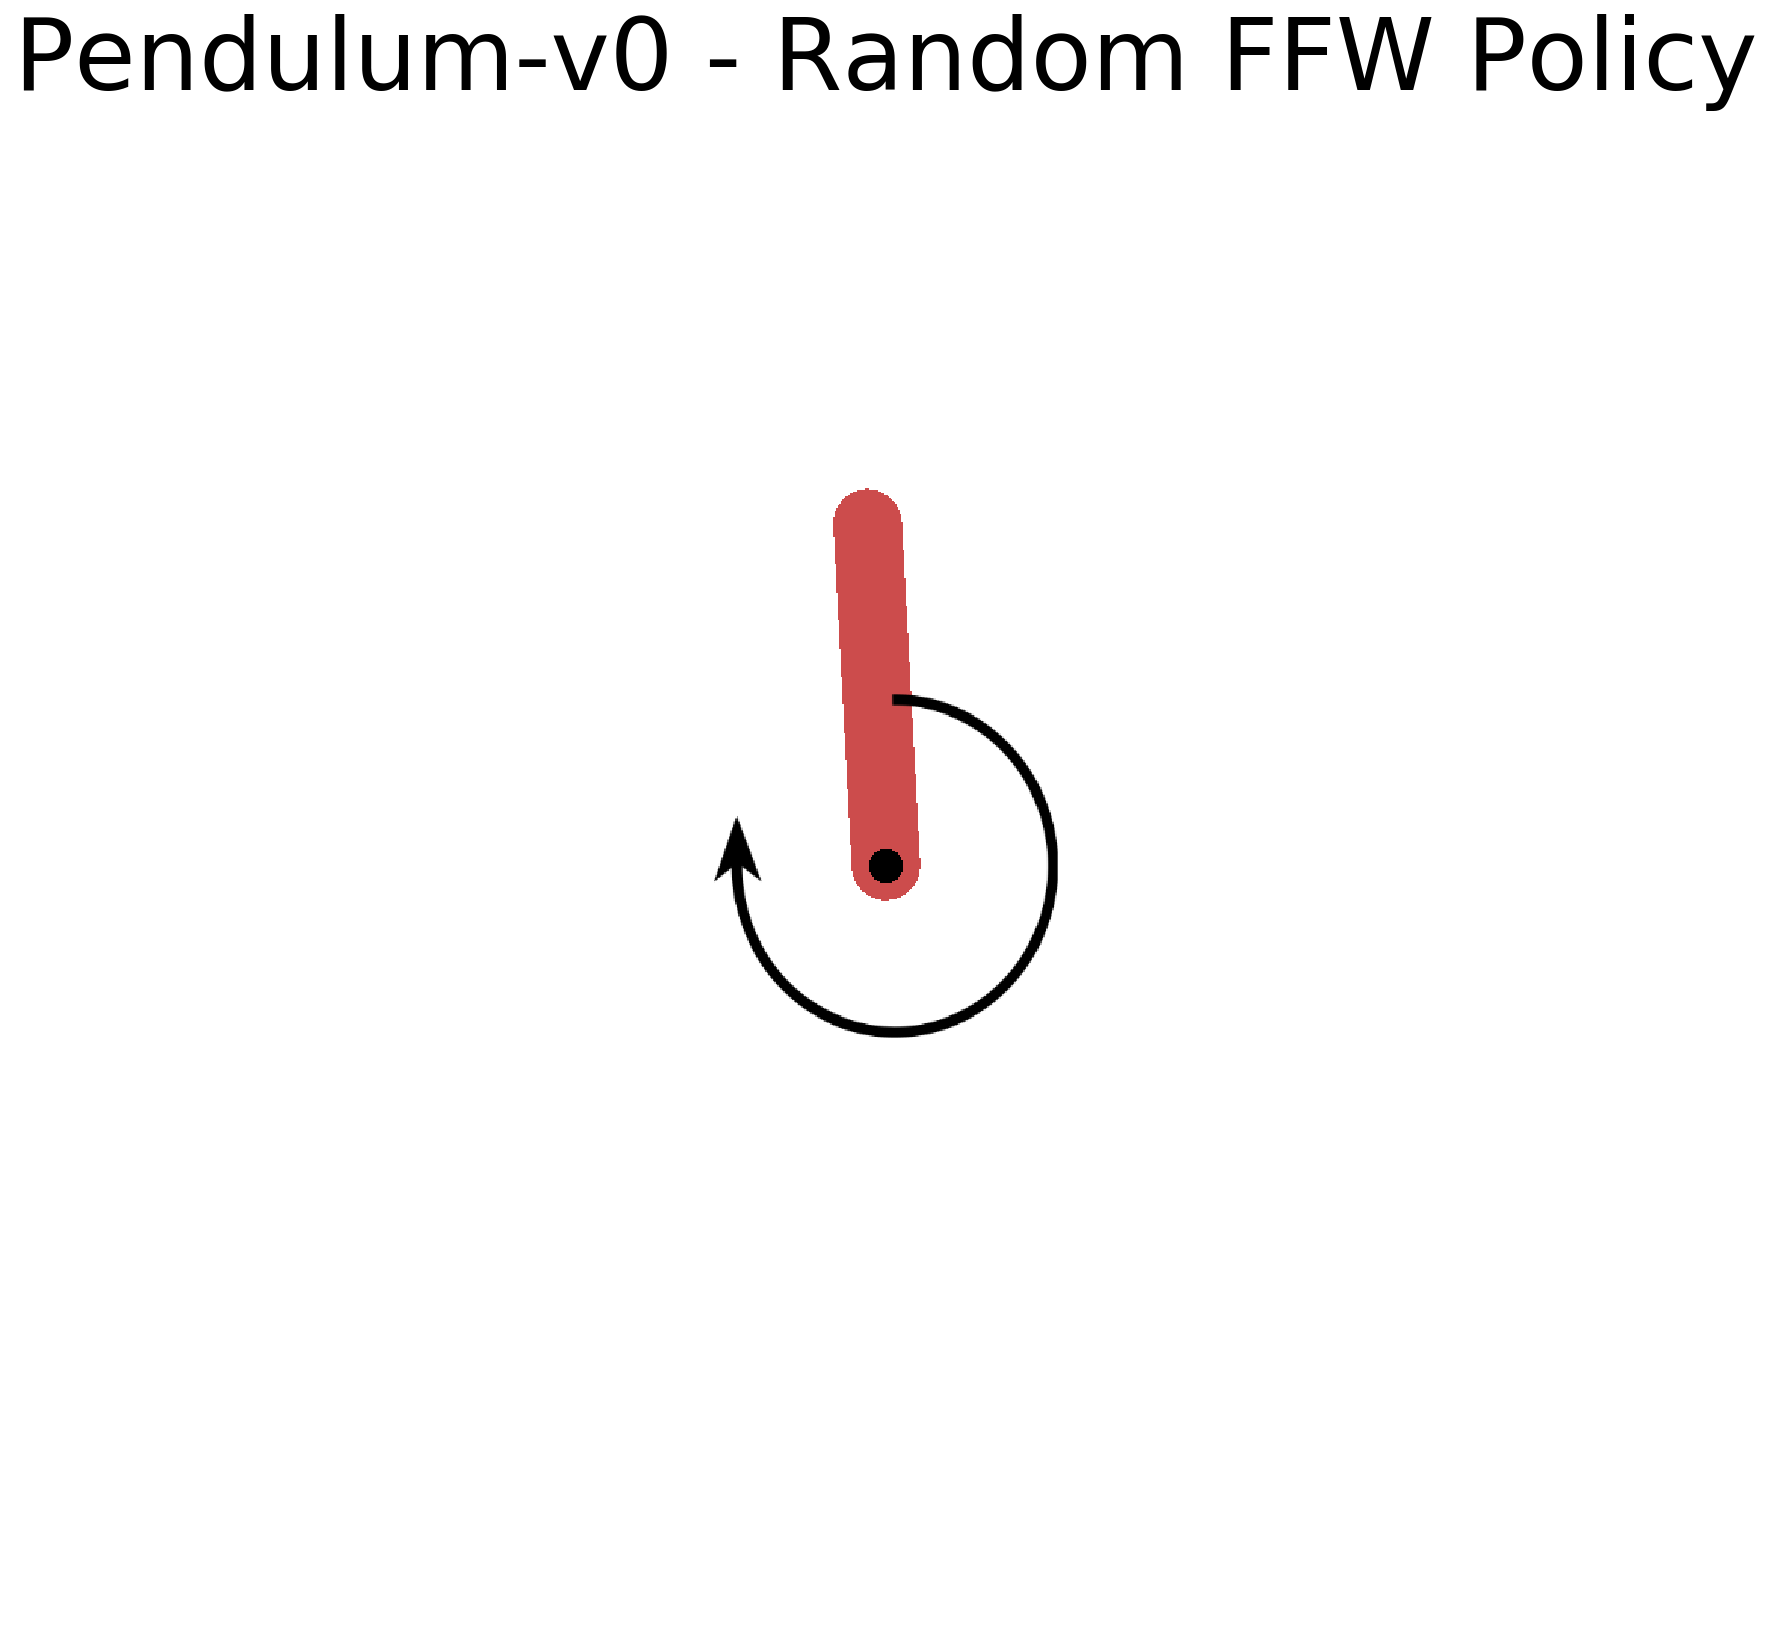

In [7]:
animator.rollout_and_animate(num_steps=200, title="Pendulum-v0 - Random FFW Policy",
                             filename="test_pendulum_anim.gif")